# Laboratorio 1

In [59]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import cv2

## Ejercicio 2

### 2.1 Construcción de histogramas normalizados

In [60]:
vaso_claro_path = "vaso_claro.jpg"

In [61]:
vaso_oscuro_path = "vaso_oscuro.jpg"

In [62]:
def normalize_histogram(hist, num_pixels):
    return [h / num_pixels for h in hist]

In [63]:
def get_normalized_histograms_from_image(image_path):
    if type(image_path) == str:
        image = Image.open(image_path)
    else:
        image = image_path
    
    hist_r = image.getchannel('R').histogram()
    hist_g = image.getchannel('G').histogram()
    hist_b = image.getchannel('B').histogram()

    num_pixels = sum(hist_r) 
    hist_r_normalized = normalize_histogram(hist_r, num_pixels)
    hist_g_normalized = normalize_histogram(hist_g, num_pixels)
    hist_b_normalized = normalize_histogram(hist_b, num_pixels)
    
    
    hist_r_normalized_np = np.array(hist_r_normalized)
    hist_g_normalized_np = np.array(hist_g_normalized)
    hist_b_normalized_np = np.array(hist_b_normalized)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    axs[0].plot(hist_r_normalized, color='red')
    axs[0].set_title('Histograma Normalizado del Canal Rojo')
    axs[0].set_xlabel('Intensidad del píxel')
    axs[0].set_ylabel('Frecuencia normalizada')

    axs[1].plot(hist_g_normalized, color='green')
    axs[1].set_title('Histograma Normalizado del Canal Verde')
    axs[1].set_xlabel('Intensidad del píxel')
    axs[1].set_ylabel('Frecuencia normalizada')

    axs[2].plot(hist_b_normalized, color='blue')
    axs[2].set_title('Histograma Normalizado del Canal Azul')
    axs[2].set_xlabel('Intensidad del píxel')
    axs[2].set_ylabel('Frecuencia normalizada')

    plt.tight_layout()

    plt.show()
    
    return hist_r_normalized_np, hist_g_normalized_np, hist_b_normalized_np

#### Imagen Clara

![Claro vaso](vaso_claro.jpg)

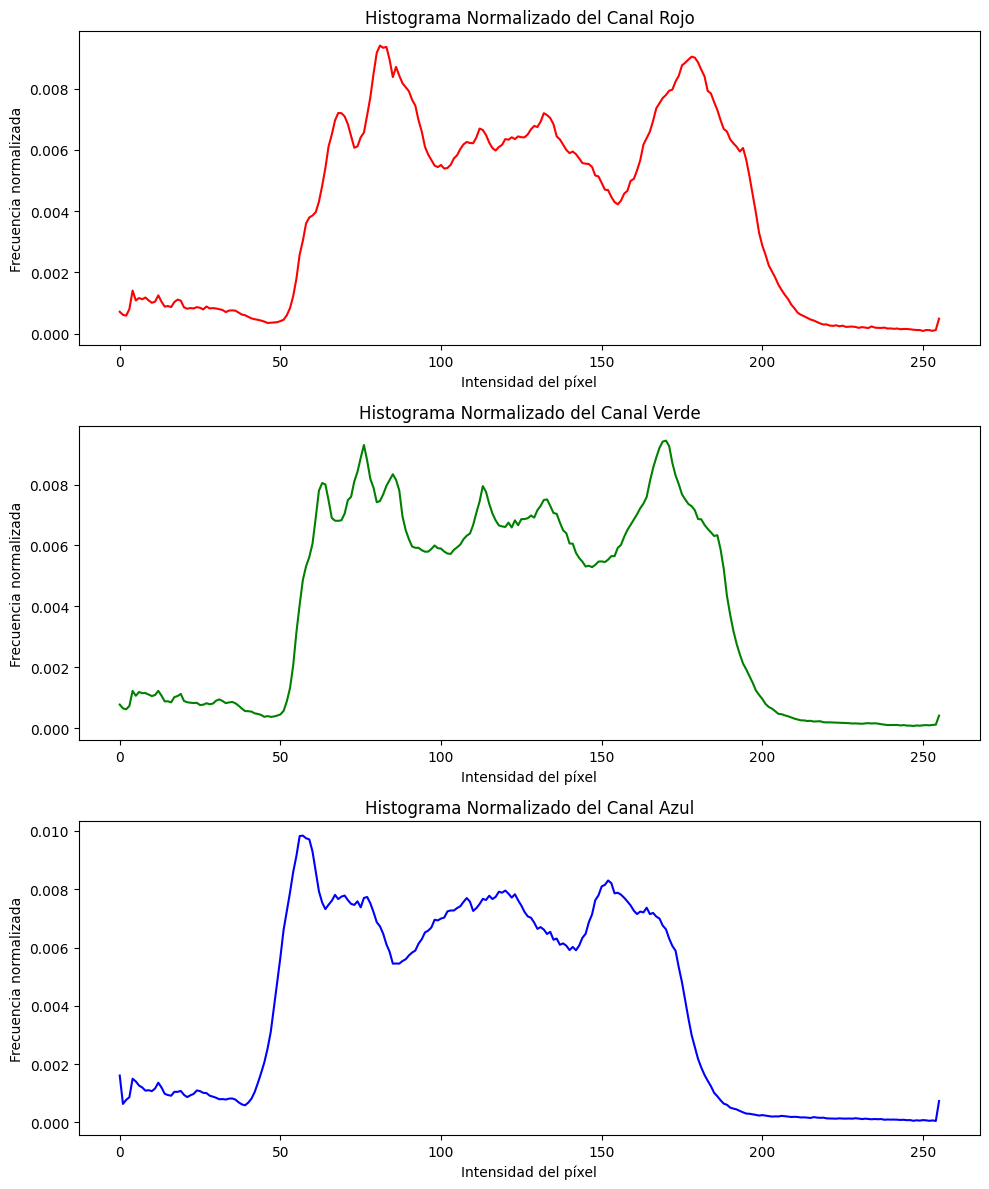

In [64]:
claro_hist_r_normalized_np, claro_hist_g_normalized_np, claro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_claro_path)

#### Imagen Obscura

![Oscuro](vaso_oscuro.jpg)

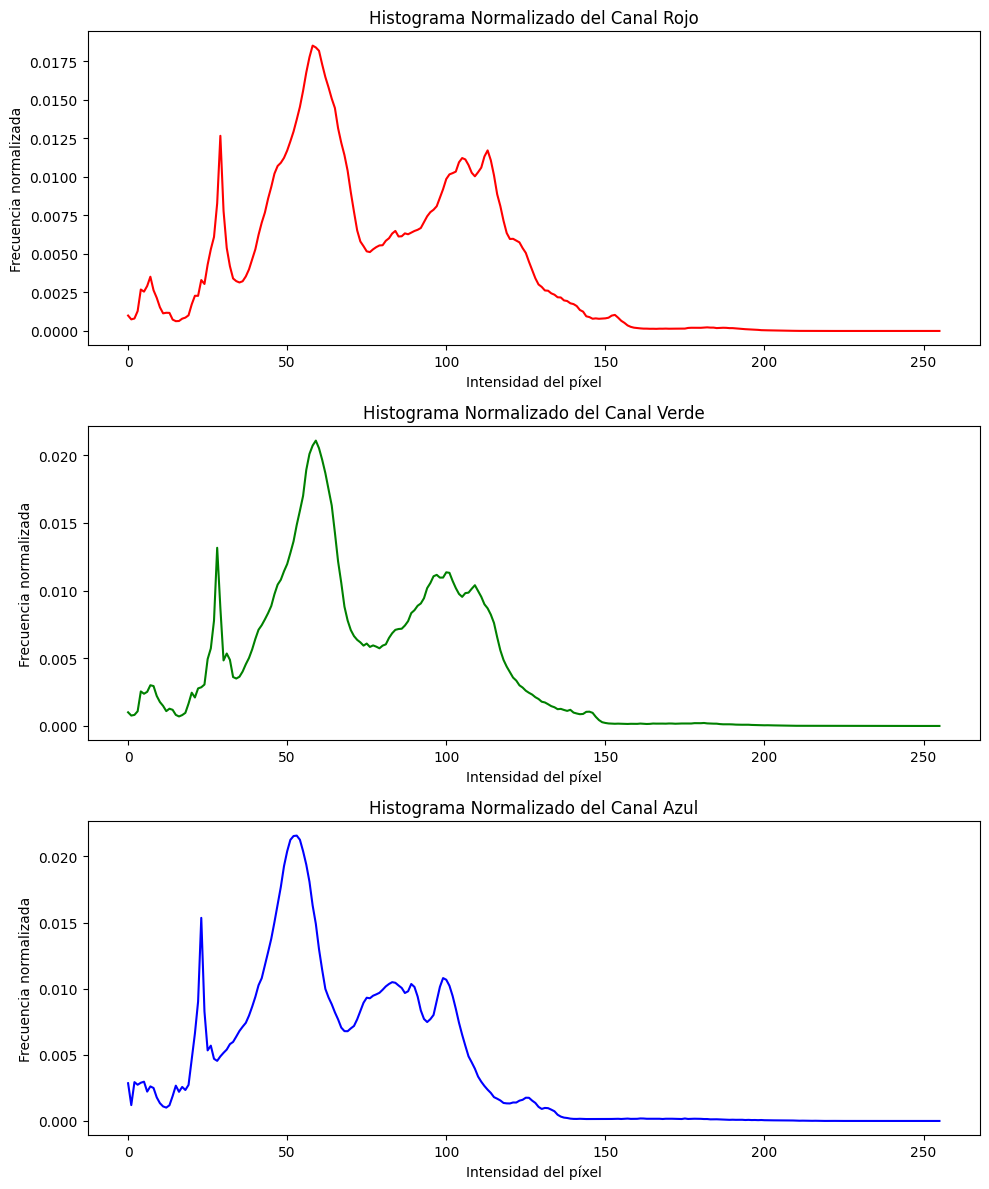

In [65]:
obscuro_hist_r_normalized_np, obscuro_hist_g_normalized_np, obscuro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_oscuro_path)

### 2.2 Distancia que compare dos histogramas

Como grupo decidimos utilizar como distancia la distancia euclidiana entre los histogramas normalizados por cada color y luego encontrar el promedio de las distancias entre los tres colores.


In [66]:
def EuclideanDistance(array1, array2):
    return np.linalg.norm(array1 - array2)


### 2.3 Comparar distancias


In [67]:
red_distance_vasos = EuclideanDistance(claro_hist_r_normalized_np, obscuro_hist_r_normalized_np)
green_distance_vasos = EuclideanDistance(claro_hist_g_normalized_np, obscuro_hist_g_normalized_np)
blue_distance_vasos = EuclideanDistance(claro_hist_b_normalized_np, obscuro_hist_b_normalized_np)

mean_distance_vasos = (red_distance_vasos + green_distance_vasos + blue_distance_vasos) / 3

print("Distancia Euclidiana entre las imágenes del vaso: ", mean_distance_vasos)

Distancia Euclidiana entre las imágenes del vaso:  0.08309024608825726


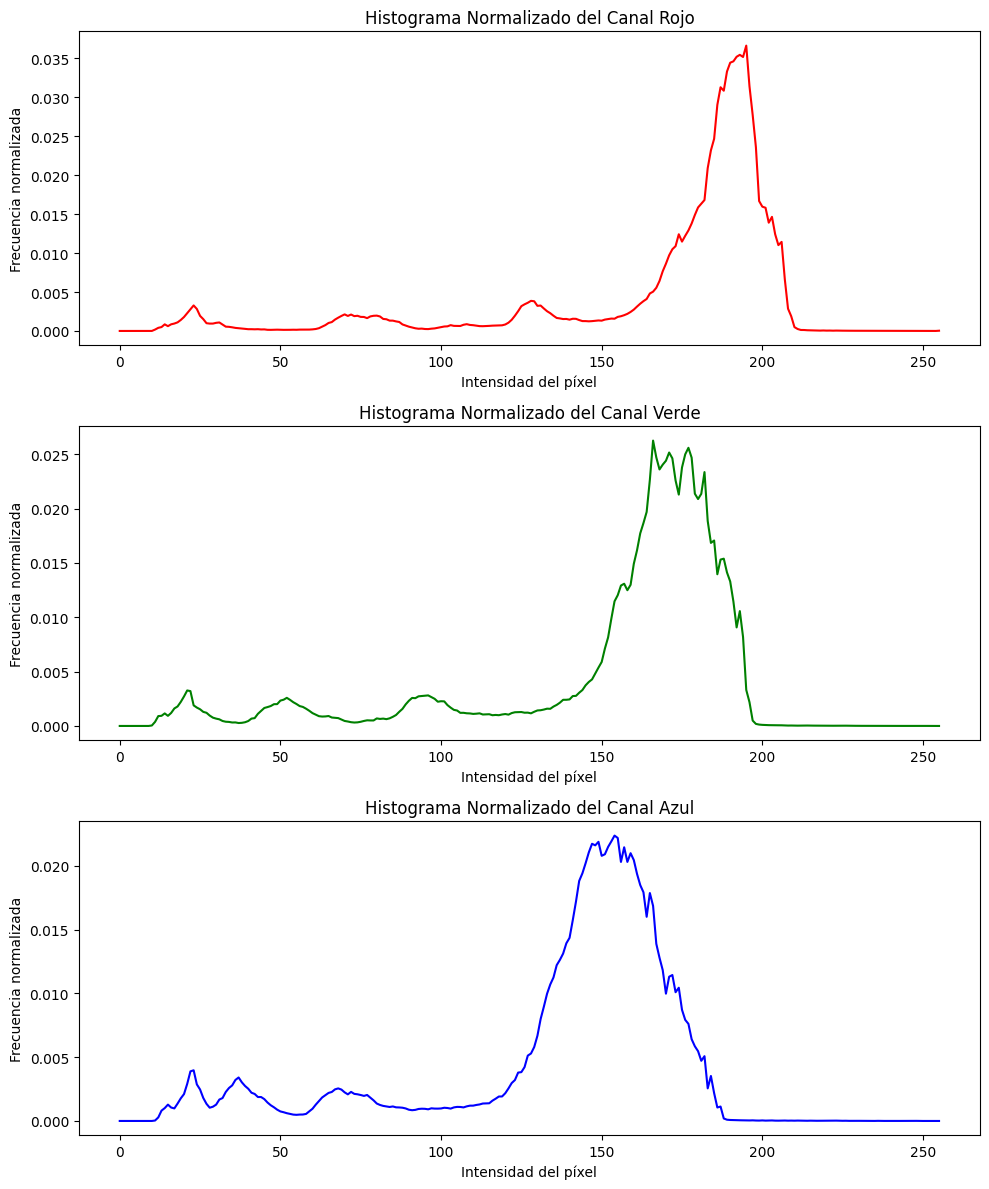

In [68]:
arena_hist_r_normalized_np, arena_hist_g_normalized_np, arena_hist_b_normalized_np = get_normalized_histograms_from_image("arena.jpg")

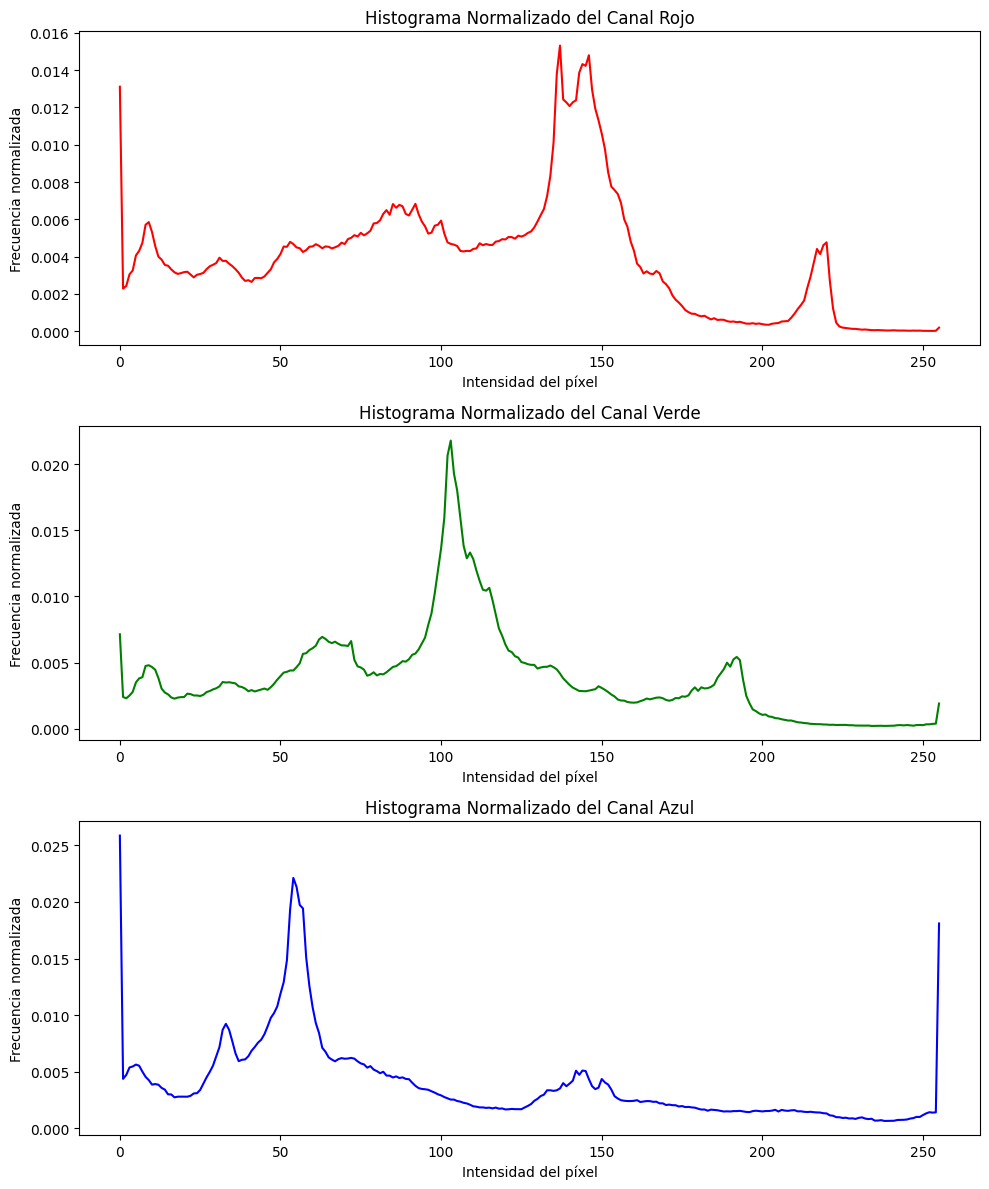

In [69]:
partido_hist_r_normalized_np, partido_hist_g_normalized_np, partido_hist_b_normalized_np = get_normalized_histograms_from_image("partido.jpg")

### Distancias con fotos distintas

In [70]:
red_distance_vaso_arena = EuclideanDistance(arena_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_arena = EuclideanDistance(arena_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_arena = EuclideanDistance(arena_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_arena = (red_distance_vaso_arena + green_distance_vaso_arena + blue_distance_vaso_arena) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena: ", mean_distance_vaso_arena)

Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena:  0.10051810229945402


In [71]:
red_distance_vaso_partido = EuclideanDistance(partido_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_partido = EuclideanDistance(partido_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_partido = EuclideanDistance(partido_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_partido = (red_distance_vaso_partido + green_distance_vaso_partido + blue_distance_vaso_partido) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y partido: ", mean_distance_vaso_partido)

Distancia Euclidiana entre las imágenes de vaso claro y partido:  0.0600143479596248


### 2.4 Convertir de RGB a HSV


In [72]:
def Convert_RGB_HSV(imagen_rgb):
    return imagen_rgb.convert('HSV')

In [75]:
vaso_claro_hsv = Convert_RGB_HSV(Image.open(vaso_claro_path))
vaso_oscuro_hsv = Convert_RGB_HSV(Image.open(vaso_oscuro_path))
arena_hsv = Convert_RGB_HSV(Image.open("arena.jpg"))
partido_hsv = Convert_RGB_HSV(Image.open("partido.jpg"))

### 2.5 Construir histogramas HSV

In [84]:
def HSV_HIStogram(imagen_hsv):
    
    array_hsv = np.array(imagen_hsv)
    
    h_values = array_hsv[:, :, 0].ravel()
    s_values = array_hsv[:, :, 1].ravel()

    # Crear histogramas para H y S
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(h_values, bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histograma de H (Hue)')
    plt.xlabel('Valor de H')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(s_values, bins=256, range=(0, 256), color='green', alpha=0.7)
    plt.title('Histograma de S (Saturation)')
    plt.xlabel('Valor de S')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()
    
    return h_values, s_values

####  Histograma HSV de la imagen vaso claro

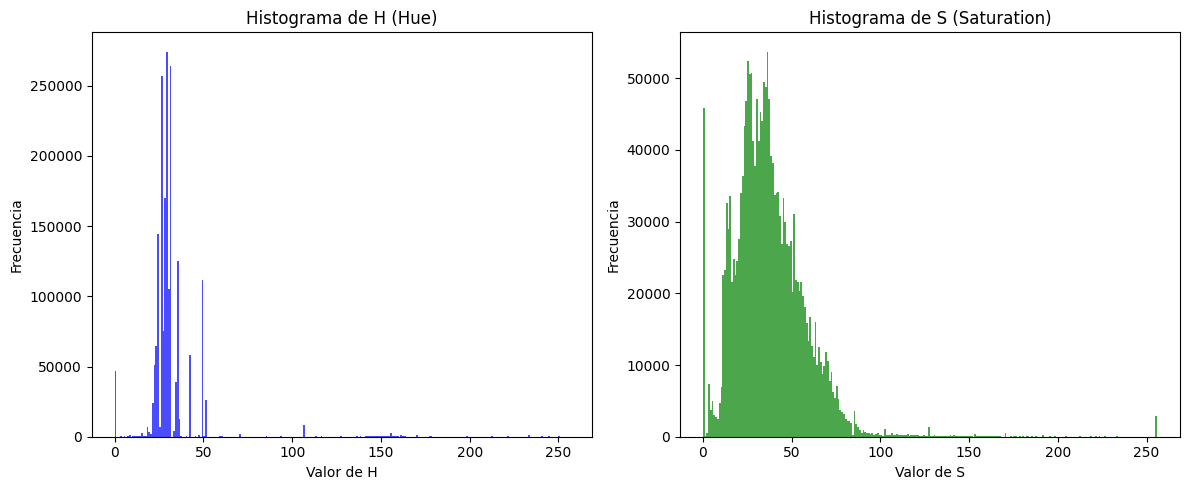

In [85]:
h_values_vaso_claro, s_values_vaso_claro = HSV_HIStogram(vaso_claro_hsv)

#### Histograma HSV de la imagen vaso oscuro

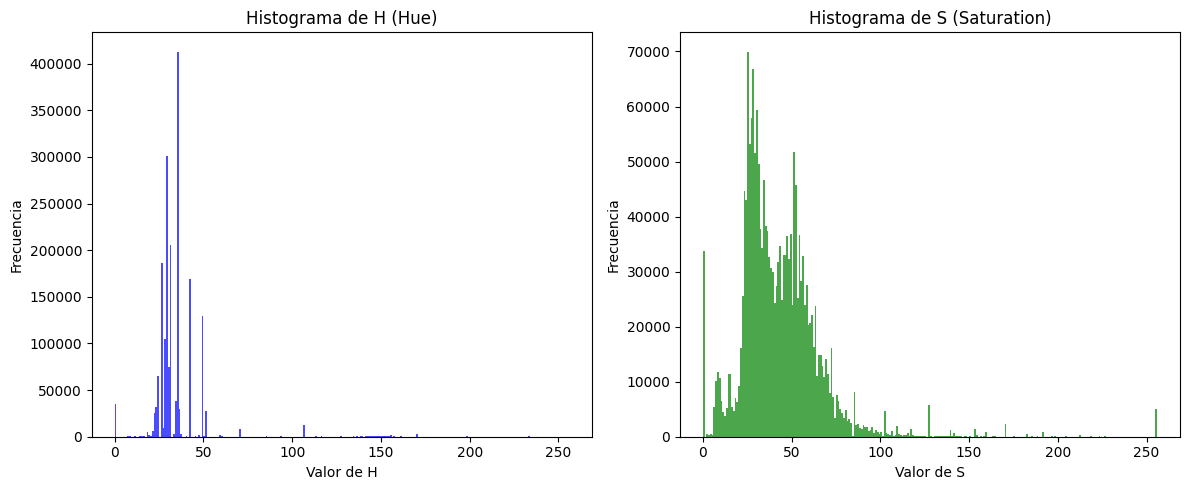

In [86]:
h_values_vaso_oscuro, s_values_vaso_oscuro = HSV_HIStogram(vaso_oscuro_hsv)


#### Histograma HSV de la imagen reloj de arena

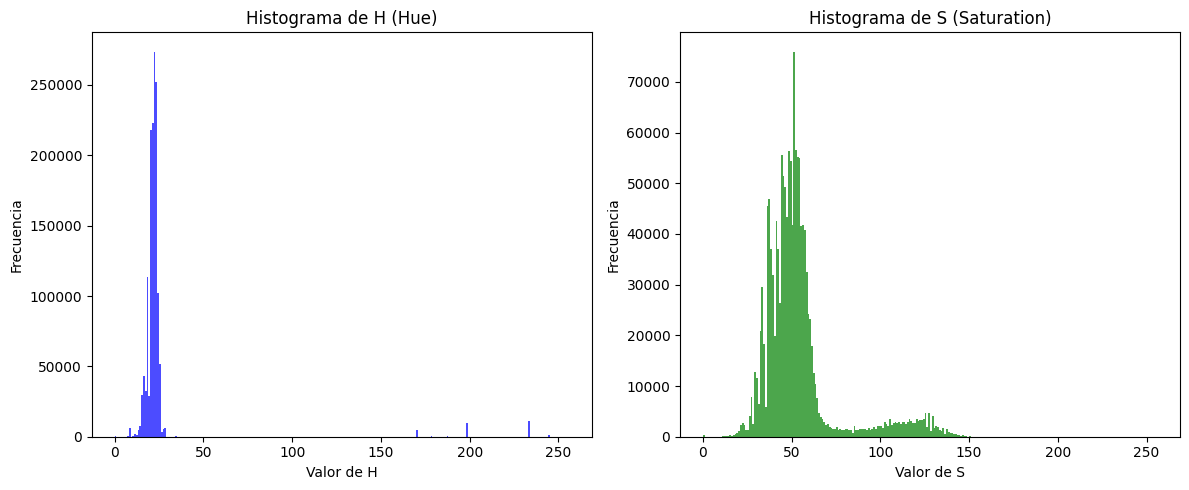

In [90]:
h_values_arena, s_values_arena = HSV_HIStogram(arena_hsv)

#### Histograma HSV de la imagen partido


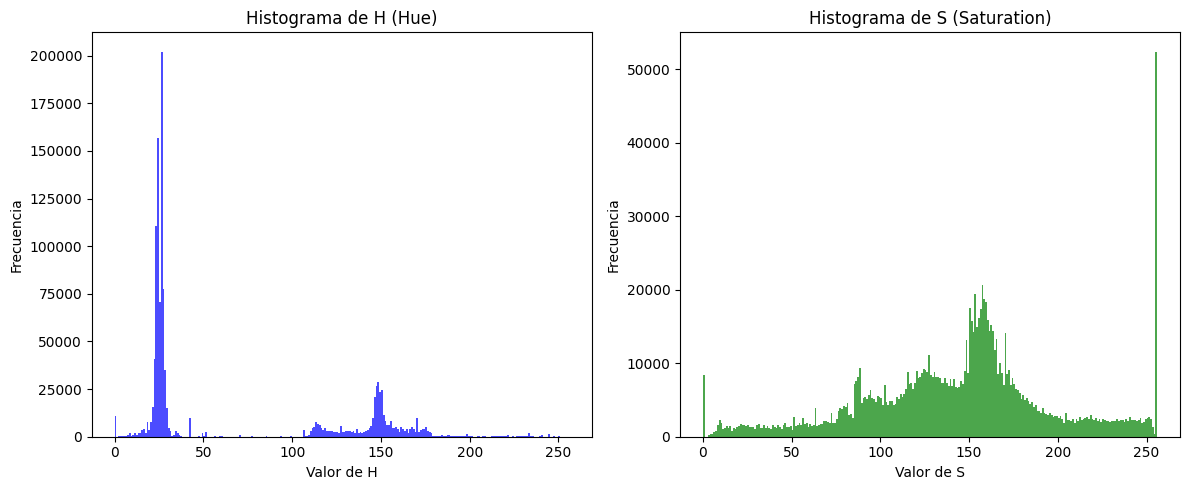

In [91]:
h_values_partido, s_values_partido = HSV_HIStogram(partido_hsv)

### Comparación 

## Ejercicio 3

In [83]:
def open_image(path):
    return np.array(Image.open(path))

In [88]:
def equalize_histogram(image_path):
    image = Image.open(image_path)

    normalized_histogram = normalize_histogram(image.histogram(), image.size[0] * image.size[1])
    
    cumulative_histogram = np.cumsum(normalized_histogram)

    equalized_histogram = np.round(cumulative_histogram * 255).astype(np.uint8)

    return equalized_histogram, normalized_histogram

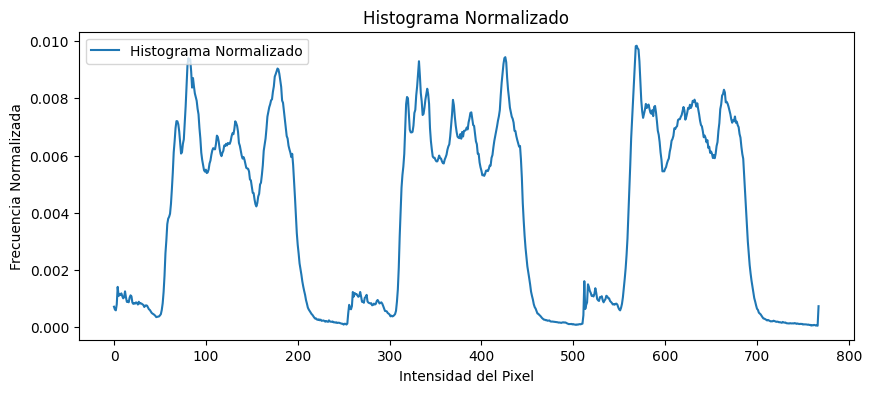

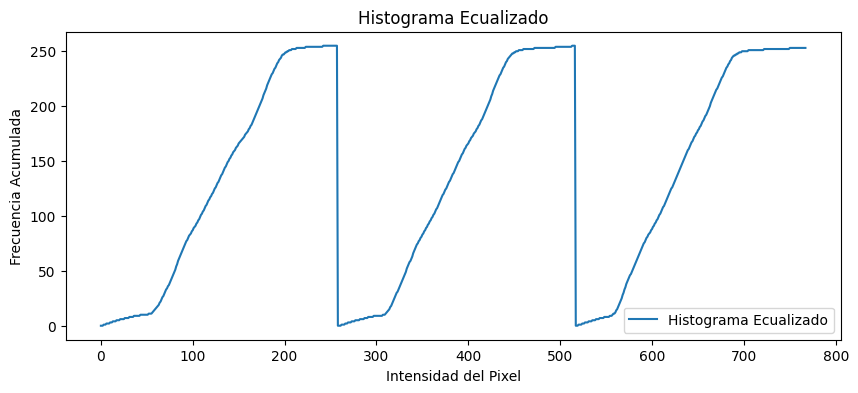

In [89]:
image_path = "vaso_claro.jpg"
equalized_histogram, normalized_histogram = equalize_histogram(image_path)

plt.figure(figsize=(10, 4))
plt.plot(normalized_histogram, label='Histograma Normalizado')
plt.title('Histograma Normalizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Normalizada')
plt.legend()
plt.show()

# Trazar el Histograma Ecualizado
plt.figure(figsize=(10, 4))
plt.plot(equalized_histogram, label='Histograma Ecualizado')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Acumulada')
plt.legend()
plt.show()